In [1]:
# cargar ibliotecas de pandas y numpy
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib. pyplot as plt

from scipy.stats import anderson

import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import t

In [2]:
# la ruta del archivo .xlsx
ruta_data = "C:\\Users\\jeiso\\Documents\\Jupyter NoteBook\\Datos\\Dataset.xlsx"

# Carga el archivo .xlsx en un DataFrame de Pandas
data = pd.read_excel(ruta_data)

# Muestra los primeros registros del DataFrame para verificar
print(data.head())


   Tiempo(s)        BPM
0          0  90.435881
1         10  91.375558
2         20  93.177147
3         30  92.253070
4         40  93.297168


In [3]:
# Datos de BPM
bpm_datos = data['BPM']

# Prueba de normalidad de Anderson-Darling
anderson_out = anderson(bpm_datos)

# Promedio ponderado de los datos de BPM
Pponderado_bpm = np.average(bpm_datos)

# Desviación estándar de los datos de BPM
desv_estand_bpm = np.std(bpm_datos)

# Imprimir promedio ponderado y desviación estándar
print("El promedio ponderado de los datos de BPM es:", Pponderado_bpm)
print("La desviación estándar de los datos de BPM es:", desv_estand_bpm)
print("El estadístico de Anderson-Darling es:", anderson_out.statistic)
print("Los niveles de significancia:", anderson_out.significance_level)
print("Los valores críticos:", anderson_out.critical_values)

# Este es un ciclo para diferentes niveles de significancia
for significancia in anderson_out.significance_level:
    p_valor = anderson_out.statistic
    
    print("\n- Nivel de significancia:", significancia, "%",  "---")
    print("Valores críticos:", anderson_out.critical_values)
    print("Nivel de significancia:", significancia, "%")
    
    if p_valor < significancia/100:
        print("Los datos no se adecuan a una distribución normal (se rechaza la hipótesis nula)")
    else:
        print("Los datos se adecuan a una distribución normal (se acepta la hipótesis nula)")


El promedio ponderado de los datos de BPM es: 129.15458577437957
La desviación estándar de los datos de BPM es: 19.649260779008685
El estadístico de Anderson-Darling es: 0.5773116880453841
Los niveles de significancia: [15.  10.   5.   2.5  1. ]
Los valores críticos: [0.559 0.637 0.764 0.891 1.06 ]

- Nivel de significancia: 15.0 % ---
Valores críticos: [0.559 0.637 0.764 0.891 1.06 ]
Nivel de significancia: 15.0 %
Los datos se adecuan a una distribución normal (se acepta la hipótesis nula)

- Nivel de significancia: 10.0 % ---
Valores críticos: [0.559 0.637 0.764 0.891 1.06 ]
Nivel de significancia: 10.0 %
Los datos se adecuan a una distribución normal (se acepta la hipótesis nula)

- Nivel de significancia: 5.0 % ---
Valores críticos: [0.559 0.637 0.764 0.891 1.06 ]
Nivel de significancia: 5.0 %
Los datos se adecuan a una distribución normal (se acepta la hipótesis nula)

- Nivel de significancia: 2.5 % ---
Valores críticos: [0.559 0.637 0.764 0.891 1.06 ]
Nivel de significancia: 2.5

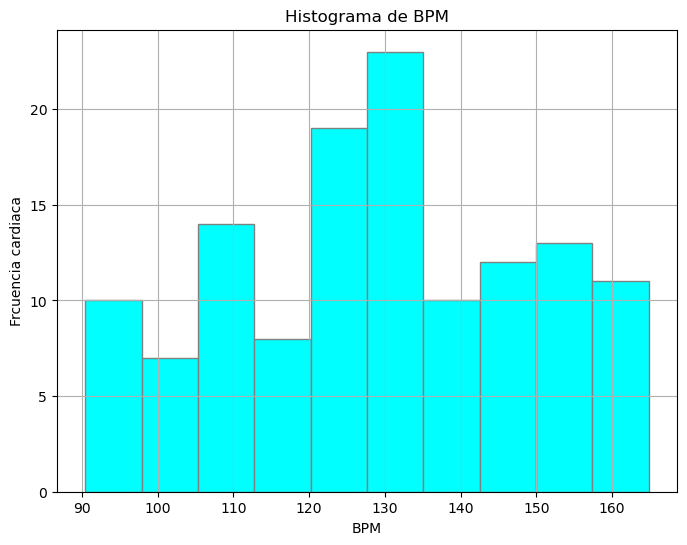

In [6]:
# Tamaño de la figura
plt.figure(figsize=(8, 6))

# Grafico del histograma
plt.hist(bpm_datos, bins=10, color='cyan', edgecolor='gray')

# Nombres en las etiquetas del plot
plt.xlabel('BPM')
plt.ylabel('Frcuencia cardiaca')
plt.title('Histograma de BPM')

# Mostrar la cuadrícula en el plot
plt.grid(True)

# Mostrar plot
plt.show()

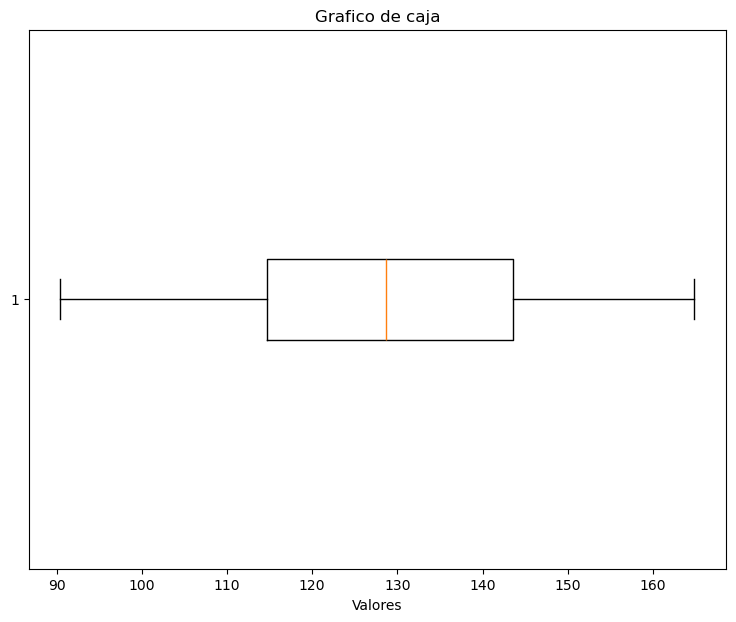

No hay valores atípicos.


In [8]:
def detectar_atipicos(data):
    # Graficar un Box Plot para visualizar la distribución de los datos
    plt.figure(figsize=(9, 7))
    plt.boxplot(data, vert=False)  # Box Plot horizontal
    plt.xlabel('Valores')
    plt.title('Grafico de caja')
    plt.show()
    
    # Calcular la media y la desviación estándar de los datos
    media = np.mean(data)
    desv_estand = np.std(data)
    
    # Realizar el test de Grubbs para detectar valores atípicos
    n = len(data)
    t_critico = t.ppf(1 - 0.05 / (2 * n), n - 2)  # Calcular el valor crítico t de Student
    grubbs_valor_critico = (n - 1) / np.sqrt(n) * np.sqrt(t_critico ** 2 / (n - 2 + t_critico ** 2))  # Calcular el valor crítico de Grubbs
    val_max = np.max(data)
    val_min = np.min(data)
    atipico_det = False

    # Iterar hasta que no se encuentren más valores atípicos
    while True:
        valor_z = zscore(data)
        max_valor_z = np.max(np.abs(valor_z))
        max_index = np.argmax(np.abs(valor_z))
        if max_valor_z > grubbs_valor_critico:
            atipico_det = True
            print(f"Valor atípico detectado: {data[max_index]}")
            data = np.delete(data, max_index)  # Eliminar el valor atípico de los datos
        else:
            break
    
    if not atipico_det:
        print("No hay valores atípicos.")

# Llamar a la función para detectar valores atípicos en los datos de BPM
detectar_atipicos(bpm_datos)
